# CNN model For fashion Mnist Dataset Classication

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras

In [2]:

fas_data=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fas_data.load_data()



############################## Class naming  #####################
class_names=['Tshirt/TOP','Trouser','Pullover','Dress','Coat',
             'Sandel','Shirt','Sneaker','Bag','Ankle boot']

In [3]:
# Data preprocessing
# input [0-255] require scaling in [0-1]
train_image=train_images/255.0
test_image=test_images/255.0
# target
train_l=keras.utils.to_categorical(train_labels,10) # 10 class

test_l=keras.utils.to_categorical(test_labels,10)
train_images=np.expand_dims(train_image,3)
test_images=np.expand_dims(test_image,3)

print(test_image.shape)
print(train_images.shape)
print(train_l.shape)

(10000, 28, 28)
(60000, 28, 28, 1)
(60000, 10)


In [4]:
cnn_model=tf.keras.Sequential()
cnn_model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',
                                 input_shape=(28,28,1))) 
cnn_model.add(tf.keras.layers.Dropout(0.4))
cnn_model.add(tf.keras.layers.Dense(100))
cnn_model.add(tf.keras.layers.MaxPooling2D((2,2)))
cnn_model.add(tf.keras.layers.BatchNormalization())
cnn_model.add(tf.keras.layers.Conv2D(64,5))

cnn_model.add(tf.keras.layers.Dense(50))
cnn_model.add(tf.keras.layers.AveragePooling2D(2,2))
cnn_model.add(tf.keras.layers.Dropout(0.4))
cnn_model.add(tf.keras.layers.Conv2D(128,2,activation='relu'))
cnn_model.add(tf.keras.layers.Flatten())
cnn_model.add(tf.keras.layers.Dense(10,activation='softmax')) 
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
hist=cnn_model.fit(train_images,train_l,epochs=10,verbose=1,validation_split=0.2)
cnn_model.summary()


Epoch 1/10
1500/1500 [==============================] - 199s 133ms/step - loss: 0.5401 - accuracy: 0.8049 - val_loss: 0.4099 - val_accuracy: 0.8461
Epoch 2/10
1500/1500 [==============================] - 210s 140ms/step - loss: 0.3943 - accuracy: 0.8577 - val_loss: 0.4271 - val_accuracy: 0.8521
Epoch 3/10
1500/1500 [==============================] - 214s 142ms/step - loss: 0.3675 - accuracy: 0.8645 - val_loss: 0.8293 - val_accuracy: 0.7624
Epoch 4/10
1500/1500 [==============================] - 196s 131ms/step - loss: 0.3453 - accuracy: 0.8733 - val_loss: 1.2081 - val_accuracy: 0.7381
Epoch 5/10
1500/1500 [==============================] - 218s 146ms/step - loss: 0.3386 - accuracy: 0.8767 - val_loss: 1.2515 - val_accuracy: 0.7372
Epoch 6/10
1500/1500 [==============================] - 207s 138ms/step - loss: 0.3253 - accuracy: 0.8807 - val_loss: 0.6774 - val_accuracy: 0.8058
Epoch 7/10
1500/1500 [==============================] - 227s 151ms/step - loss: 0.3187 - accuracy: 0.8833 - val_

In [5]:
test_loss1,test_acc1=cnn_model.evaluate(test_images,test_l)
print(test_acc1)

313/313 [==============================] - 9s 28ms/step - loss: 0.7094 - accuracy: 0.8086
0.8086000084877014


In [6]:
import pickle
with open('cnntrainHistory', 'wb') as file_pi:
        pickle.dump(hist.history, file_pi)

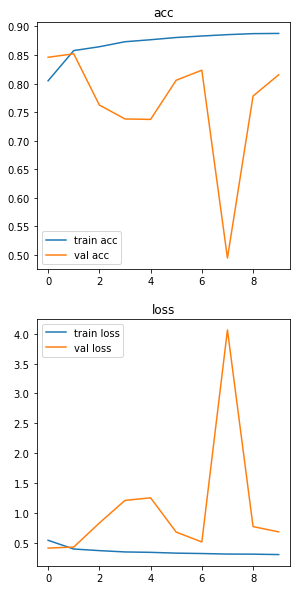

In [7]:
def history_graph():
    plt.figure(figsize=(10,10))
    train_acc=hist.history['accuracy']
    val_acc=hist.history['val_accuracy']
    train_loss=hist.history['loss']
    val_loss=hist.history['val_loss']
    plt.subplot(2,2,1)
    plt.plot(train_acc,label='train acc')
    plt.plot(val_acc,label='val acc')
    plt.legend()
    plt.title('acc')
    plt.subplot(2,2,3)
    plt.plot(train_loss,label='train loss')
    plt.plot(val_loss,label='val loss')
    plt.legend()
    plt.title('loss')
history_graph()

In [8]:
cnn_model.save('cnn_model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: cnn_model\assets
